<a href="https://colab.research.google.com/github/Pedro-Gianini/EX6_GEOPY/blob/main/EX6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Execício M6 - Manipulação de dados matriciais (raster)**

Agora vamos praticar e expandir o que aprendemos no módulo M6 - Manipulação de dados matriciais (raster). O objetivo é usar o GEE para baixar uma imagem Sentinel 2, realizar o recorte dessae imagem e calcular o NDVI. Os arquivos necessários para esse exercícios estão na pasta [M6](https://drive.google.com/drive/folders/1-rBLHhmYAdi25ATRCHtiPb3eUDhfAaIU).

[Aqui](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR?hl=en#description) você encontra detalhes sobre a coleção de dados do GEE que deve ser utilizada nesse exercício.

**E1 - Baixando imagens Sentinel-2 pelo GEE**

a) Auntetique e inicialize o GEE

b) Busque imagens da coleção "COPERNICUS/S2_SR" entre as 2022-01-01 e  2022-05-22 e verifique o número de imagens encontradas

c) Leia o shapefile [dis_sampa_23s.shp](https://drive.google.com/drive/folders/1-rBLHhmYAdi25ATRCHtiPb3eUDhfAaIU). Ele deve ser utilizado para filtrar a coleção de imagens do GEE

d) Filtre a coleção de imagens para obter apenas imagens com cobertura de nuvens inferior a 5%

e) Selecione e visualize a primeira imagem da coleção filtrada

f) Faça o download das bandas de reflectância de superfície apenas


**E2 -  Recorte de raster com shapefile**

a) Abra e visualize a imagem baixada em E1. Sobreponha a geometria dos limites dos distritos de São Paulo (dis_sampa_23s.shp)

b) Extraia o retângulo envolvente do distrito de SANTANA 

c) Recorte a imagem sentinel com o retângulo envolvente extraído em b. Salve o resultado em um novo raster.

d) Visualize o recorte



**E3 - Manipulação de bandas**

a) Leia a imagem recortada em E2 e visualize o histograma de todas as bandas

b) Crie novas variáveis para armazenar as bandas do vermelho e infravermelho

c) Calcule, exporte como uma nova imagem e visualize o NDVI

d) Calcule o NDVI minímo, máximo, médio e mediano para o distrito de Santana


**E1 - Baixando imagens Sentinel-2 pelo GEE**

a) Auntetique e inicialize o GEE

In [1]:
# Instale as biblitotecas para usar o GEE
!pip install geemap -q
!pip install geopandas -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 99.3 MB/s eta 0:00:00


In [2]:
# Importe as bibliotecas
import ee
import geemap
import geopandas as gpd
import numpy as np

In [3]:
# Auntentique o API do GEE
ee.Authenticate()
# Inicialize o API do GEE
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=e2pQQzNPTNnXoPYU7Ggh_RNom4CHSN1LRwyOu6MPrTU&tc=fKic04WC5vVuo3-xtSSMCZykZtc1BtTud6IoZF2XSKE&cc=hUMp2Akz8-yCDGAHMujj-NTXy4Jd6A2rIJ3yxHR3vHI

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VP_TI0XGs-tVmsHJTP2KqtSVFg1hOblbHGIMreN40G1INj-WMr41wE

Successfully saved authorization token.


b) Busque imagens da coleção "COPERNICUS/S2_SR" entre as 2022-01-01 e  2022-05-22 e verifique o número de imagens encontradas


In [4]:
# Crie um objeto do tipo imagem para representar a imagem do GEE. Use o caminho (na coleção do GEE) para a imagem desejada como argumento.
image = ee.ImageCollection("COPERNICUS/S2_SR").filterDate('2022-01-01', '2022-05-22')

In [5]:
# Verifique o número de imagens encontradas
image.size().getInfo()

1567675

c) Leia o shapefile [dis_sampa_23s.shp](https://drive.google.com/drive/folders/1-rBLHhmYAdi25ATRCHtiPb3eUDhfAaIU). Ele deve ser utilizado para filtrar a coleção de imagens do GEE

In [6]:
# Aqui montamos o acesso ao nosso Google drive, assim podemos salvar e acessar dados diretamente de lá
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [7]:
# Leia o shapefile da área  que vai trabalhar no GEE.
sp=gpd.read_file(r'/content/drive/MyDrive/PYGEO/M2/dis_sampa_23s.shp')

# Reprojete para wgs84 lat long
sp=sp.to_crs('epsg:4326')

# Extraia as coordendas X e Y do centroide do shapefile
cx=sp.centroid.x[0]
cy=sp.centroid.y[0]

# Crie um objeto do tipo mapa centrado no centroide do shapefile. Essa etapa é opcional, serve para visualizar o dado antes de baixar.
Map = geemap.Map(center=[cy,cx], zoom=10)

<ipython-input-7-2fd67c0a13ce>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cx=sp.centroid.x[0]
<ipython-input-7-2fd67c0a13ce>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cy=sp.centroid.y[0]


In [8]:
# Crie uma lista vazia para armazenar as coordenadas do polígono que usaremso para filtrar a coleçao de imagens para uma determinada localização
all_coords = []

# Aqui uso sp.dissolve().envelope.boundary para obter apenas as coordendas do limite externo do contorno do município
for b in sp.dissolve().envelope.boundary:
    # Extraia as coordendas xy do polígono, transforme em um stack numpy de tuplas de coordenadas e depois em uma lista
    coords = np.dstack(b.coords.xy).tolist()
    # Adicione as coordenadas a nossa lista de coordenadas
    all_coords.append(*coords)

In [9]:
# Crie um polígono com as coordenadas extraidas do shapefile
geom = ee.Geometry.Polygon(all_coords)
# Transforme em uma feature
feature = ee.Feature(geom, {})
# Defina a área de interesse(roi)
roi = feature.geometry()

In [10]:
# Filtre a coleção de imagens com base no roi
img2=image.filterBounds(roi)

In [11]:
# Verifique o número de imagens na coleção
img2.size().getInfo()

59

d) Filtre a coleção de imagens para obter apenas imagens com cobertura de nuvens inferior a 5%

In [12]:
# Filtre a coleção com base na % de nuvens
img2=img2.filter('CLOUDY_PIXEL_PERCENTAGE < 5')
# Verifique o número de imagens na coleção
img2.size().getInfo()

7

e) Selecione e visualize a primeira imagem da coleção filtrada

In [13]:
# Selecione a primeira imagem da coleção
img2=ee.Image(img2.first())
# Inspecione o objeto resultante
img2

In [14]:
# Estipule os parâmetros de visualização.
sent_vis = {
    'bands': ['B8', 'B3', 'B2'],#B2=infravermelho proximo - B3=vermelho - B8=azul
    'gamma': 1.4
}

# Adicione a imagem no objeto do tipo mapa
Map.addLayer(img2, sent_vis, "COPERNICUS/S2_SR", True, 1)

In [15]:
Map

Map(center=[-23.459064324801012, -46.64040918368061], controls=(WidgetControl(options=['position', 'transparen…

f) Faça o download das bandas de reflectância de superfície apenas

In [16]:
# Selecione apenas as bandas de  reflectância de superfície (SR_B)
img2 = img2.select('B.+')

In [17]:
# Crie uma tarefa para baixar a imagem img2
task = ee.batch.Export.image.toDrive(image=img2,
                                     # defina a descrição de tarega que aparecerá no code editor do gee
                                     description='sentinel_sp',
                                     # Indique a pasta onde a imagem será salva
                                     folder='M6',
                                     # Indique a resolução espacial
                                     scale=10,
                                     # A região que deve ser baixada
                                     region=geom,
                                     # O prefixo usado para salvar a imagem
                                     fileNamePrefix='sp_s2',
                                     # Sistema de corodenadas
                                     crs='EPSG:4326',
                                     # Formato da imagem
                                     fileFormat='GeoTIFF')
# Inicie o download
task.start()

In [18]:
# Verifique o status do download
task.status()

{'state': 'READY',
 'description': 'sentinel_sp',
 'creation_timestamp_ms': 1683676478103,
 'update_timestamp_ms': 1683676478103,
 'start_timestamp_ms': 0,
 'task_type': 'EXPORT_IMAGE',
 'id': '4FOFE6YAWWBII7Y2AW3IJNTV',
 'name': 'projects/earthengine-legacy/operations/4FOFE6YAWWBII7Y2AW3IJNTV'}

**E2 -  Recorte de raster com shapefile**

a) Abra e visualize a imagem baixada em E1. Sobreponha a geometria dos limites dos distritos de São Paulo (dis_sampa_23s.shp)

In [19]:
! pip install rasterio -q
import rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 22.7 MB/s eta 0:00:00


In [20]:
# Vamos abrir com a rasterio  os dados Sentinel-2 baixamos do gee
image= rasterio.open('/content/drive/MyDrive/PYGEO/M6/sp_s2.tif')
ele=image.read()

In [21]:
# Obtenha o sistema de coordenadas
image.crs

CRS.from_epsg(4326)

In [22]:
# Verifique o número de bandas
image.count

12

<Axes: >

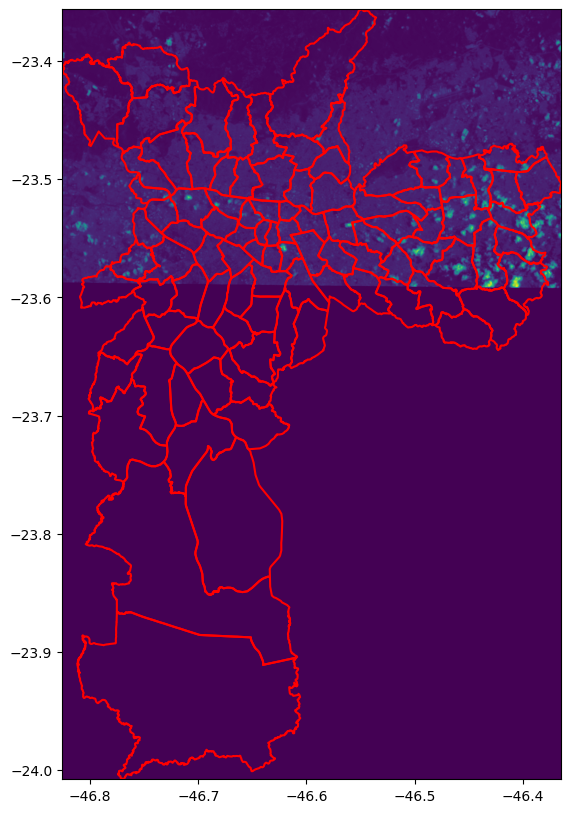

In [23]:
from rasterio.plot import show
import matplotlib.pyplot as plt


# crie a figura, o eixo de plotagem e determine o tamanho da figura
fig,ax=plt.subplots(figsize=(10,10))

# Plote o raster no eixo criado e especifique o mapa de cores e a transformação afim
mapa=show(image,ax=ax,transform=image.transform)
# Adicione ao mapa os limites dos distritos 
sp.boundary.plot(ax=ax,color='red')


b) Extraia o retângulo envolvente do distrito de SANTANA 

In [24]:
# Extraia as coordenadas do retângulo envolvente dos limites de Santana
bbox=sp[sp.ds_nome=='SANTANA'].envelope

bbox

51    POLYGON ((-46.65347 -23.51901, -46.60903 -23.5...
dtype: geometry

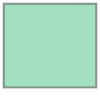

In [25]:
# Visualize a geometria do retângulo envolvente
bbox[51]

In [26]:
# Insira a geometria do retângulo envolvente em um geodataframe
geo = gpd.GeoDataFrame({'geometry': bbox[51]}, index=[0], crs=sp.crs)
# Inspecione o geodataframe
geo

,geometry
0,"POLYGON ((-46.65347 -23.51901, -46.60903 -23.5..."


In [27]:
# Verifique se o raster e o geodataframe estão no mesmo sistema de coordenadas
image.crs==geo.crs

True

c) Recorte a imagem sentinel com o retângulo envolvente extraído em b. Salve o resultado em um novo raster.

In [28]:
# defina uma função que converte o geodataframe para o fromato entendido pela rasterio
def converter_json(gdf):
  import json
  return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [29]:
# Aplique essa função aos dados
coords= converter_json(geo)

In [30]:
from rasterio.mask import mask
# Use a função mask para recortar o raster utilizando as coordenadas (convertidas) do geodataframe.
# Essa função vai retornar os dados dos pixels de saída e a transformação afim do recorte
out_img, out_transform = mask(image, shapes=coords, crop=True)

In [31]:
# Copie os metadados da imagem original
out_meta = image.meta.copy()
# Inspecione os metadados
print(out_meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 5135, 'height': 7256, 'count': 12, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, -46.82585199459941,
       0.0, -8.983152841195215e-05, -23.356107555579147)}


In [32]:
# Atualize os metadado para que sejam compatíveis com o recorte
out_meta.update({'height':out_img.shape[1],
                 'width':out_img.shape[2],
                 'transform':out_transform,
                 'nodata':0})

In [33]:
# Defina o caminho para salvar a imagem recortada
out_tif=r'/content/drive/MyDrive/PYGEO/M6/recorte_sp_s2.tif'

In [34]:
# Salve o recorte no caminho especificado e com os metadados  especificados
with rasterio.open(out_tif, "w", **out_meta) as dest:
          dest.write(out_img)

d) Visualize o recorte

In [35]:
# Abra os dados que acabou de salvar
recortado=rasterio.open(out_tif)

<Axes: >

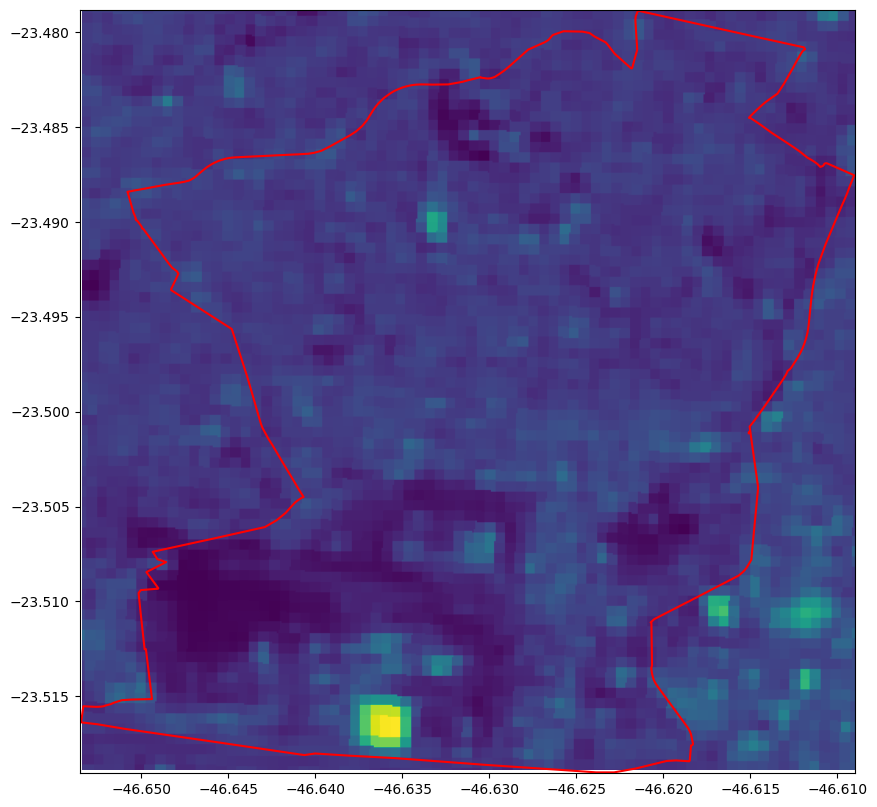

In [36]:
# Visualize o recorte
fig,ax=plt.subplots(figsize=(10,10))

mapa=show(recortado, ax=ax, transform=recortado.transform)
sp[sp.ds_nome=='SANTANA'].boundary.plot(ax=ax, color='red')

**E3 - Manipulação de bandas**

a) Leia a imagem recortada em E2 e visualize o histograma de todas as bandas


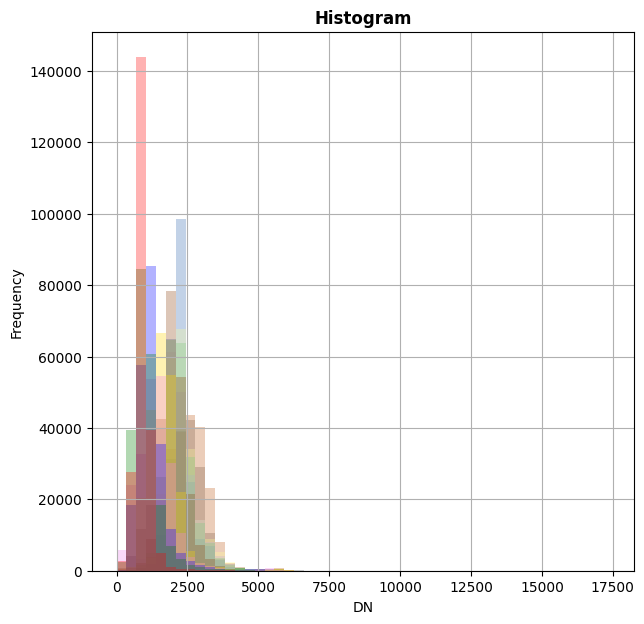

In [37]:
from rasterio.plot import show_hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(7,7))
# Visualize o histograma de todas as bandas
show_hist(recortado, ax=ax, bins=50, lw=0.0, stacked=False, alpha=0.3,
          histtype='stepfilled', title="Histogram")

ax.get_legend().remove()
plt.show()

b) Crie novas variáveis para armazenar as bandas do vermelho e infravermelho

In [38]:
# Extraia os valores das bandas do vermelho e infravermelho próximo
red = recortado.read(4)
nir = recortado.read(8)

c) Calcule, exporte como uma nova imagem e visualize o NDVI

In [39]:
# Criando filtro para calcular apenas onde as bandas forem maiores que zero. Assim eu evito calcular na áreas de no data
check = np.logical_or ( red > 0, nir > 0 ) 

In [40]:
# Aplicando os fatore de escalonamento (de acordo com a documentação do GEE) para transformar os dados em refletância 
# repare que eu uso o np.where para aplicar um filtro e calcular apenas nas áreas onde as condições dadas na célula acima
# são verdadeiras
red = np.where(check, (red.astype(float)/10000),np.nan)
nir = np.where(check, (nir.astype(float)/10000),np.nan)

In [41]:
# Criando filtro para calcular apenas onde as bandas forem maiores que zero e menor que 1. Ou seja, estão dentro do esperado
# para valores de refletância
check = np.logical_and(nir >=0, nir<=1)
check

array([[False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

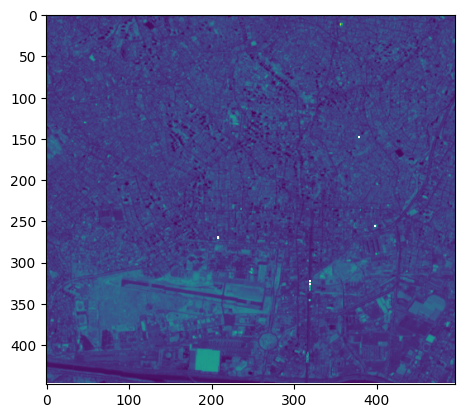

<Axes: >

In [42]:
# Substitua os valores <0  ou > 1 por np.nan
nir = np.where (check, nir, np.nan )
# Visualize a banda do nir
show(nir)

In [43]:
# Repetindo a mesma filtragem para a banda do vermelho
check = np.logical_and(red >=0, red<=1)
check

array([[False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

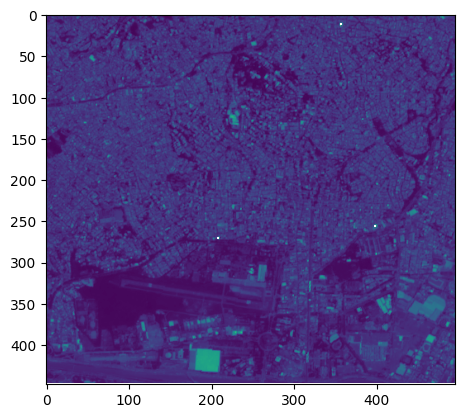

<Axes: >

In [44]:
# Repetindo a mesma filtragem para a banda do vermelho
red = np.where (check, red, np.nan )
show(red)

In [45]:
# Peça que a numpy ignore divisão por zero. Caso contrário teremos um erro e o ndvi não será calculado
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [46]:
# Calcule o NDVI 
ndvi= (nir-red)/(nir+red)

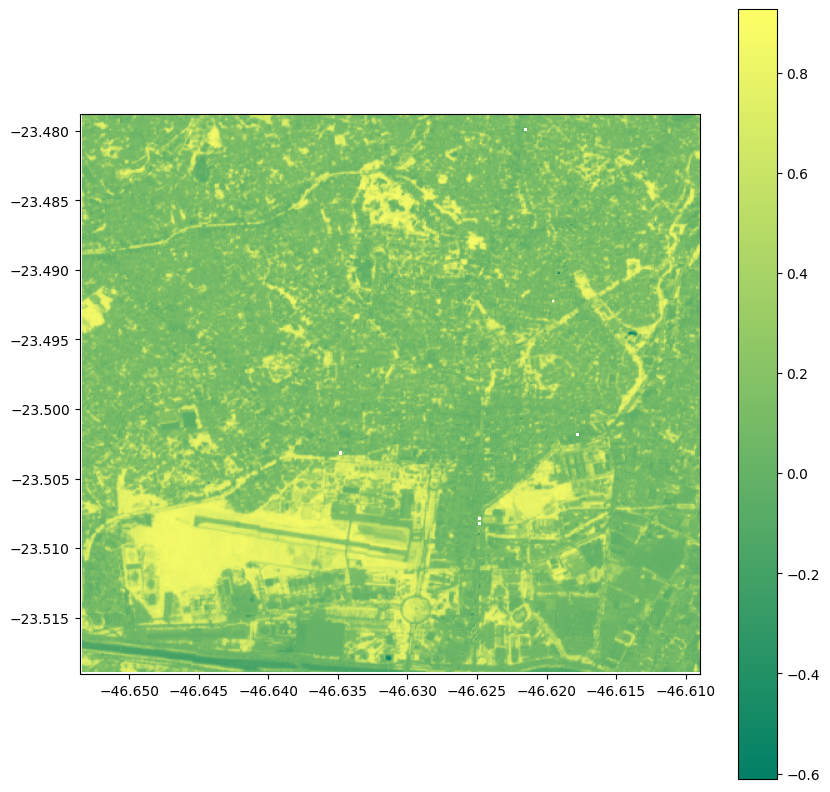

In [47]:
# Visualize o resultado 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

retted = show(ndvi, ax=ax, cmap='summer', transform=recortado.transform)
im = retted.get_images()[0]
fig.colorbar(im, ax=ax)

In [48]:
# Para exportar precisamos criar um stack, mesmo que apenas com uma banda
ndvi=np.stack([ndvi])

In [49]:
# Copie os metadados da imagem original
out_meta=recortado.meta.copy()
# Inspecione os metadados
print(out_meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 496, 'height': 448, 'count': 12, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, -46.653555123105285,
       0.0, -8.983152841195215e-05, -23.478817423389874)}


In [50]:
# Atualize os metadados
out_meta.update({
    'count':1,
    'dtype': 'float64'
})

In [51]:
# Defina onde o NDVI será salvo
out_tif=r'/content/drive/MyDrive/PYGEO/M6/ndvi_s2.tif'

In [52]:
# Exporte os dados de NDVI para o caminho especificado com os mdetadados atualizados
with rasterio.open(out_tif, "w", **out_meta) as dest:
          dest.write(ndvi)

d) Calcule o NDVI minímo, máximo, médio e mediano para o distrito de Santana

In [53]:
# Instale as bibliotecas
!pip install rasterstats -q
!pip install geopandas -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 12.0 MB/s eta 0:00:00


In [54]:
# Importe as bibliotecas
from rasterstats import zonal_stats


In [55]:
# Calcule as estatistícas zonais de NDVI para todos os distritos
zs_ndvi=zonal_stats(geo, out_tif,nodata='-999', stats=['min', 'max', 'mean', 'median'])


In [56]:
zs_ndvi

[{'min': -0.6115107913669066,
  'max': 0.9269687637483501,
  'mean': 0.2305395831571844,
  'median': 0.14404432132963993}]